# Producten week 1-2

In [139]:
# Handige Jupyter magic
%config IPCompleter.greedy = True
%matplotlib inline

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We beginnen met de vektis data uitlezen, dit zal de core van onze data zijn in de Proof of Concept. Hier heb ik gebruikt gemaakt van een handige functie voor het uitlezen van meerdere jaren. Alle data van voor 2015 valt buiten de scope in verband met veel gaten in die data.

In [141]:
# data uitlezen
def read_vektis_data(dir, start, end):
    dfArray = []

    for i in range(start, end):
        df = pd.read_csv(f'{dir}/vektis_20{i}.csv', sep=';', dtype={'geslacht': str, 'leeftijdsklasse': str}, low_memory=False)
        df.columns = df.columns.str.lower()
        df['jaar'] = 2000 + i
        dfArray.append(df)

    return pd.concat(dfArray)

# Read the data - data van voor 2015 mist veel GGZ data en is dus weggelaten
df = read_vektis_data('./Vektis', 15, 21)

# Veel null waarden op kosten_eerstelijnsverblijf, dus die kolom droppen
df = df.drop(columns=['kosten_eerstelijnsverblijf'])

# if column kosten_gzsp is not null then concat kosten_gzsp and kosten_overig into kosten_overig
df['kosten_overig'] = df.apply(lambda row: row['kosten_gzsp'] if pd.notnull(row['kosten_gzsp']) else row['kosten_overig'], axis=1)
df = df.drop(columns=['kosten_gzsp', 'aantal_verzekerdejaren']).dropna()

# Loop through columns with prefix kosten_ and divide by aantal_bsn
# for column in df.columns:
#     if column.startswith('kosten_'):
#         df[column] = df[column] / df['aantal_bsn']


# df = df.drop(columns=['aantal_bsn'])

df.info()
df.head()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80352 entries, 1 to 13061
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   geslacht                                80352 non-null  object 
 1   leeftijdsklasse                         80352 non-null  object 
 2   gemeentenaam                            80352 non-null  object 
 3   aantal_bsn                              80352 non-null  int64  
 4   kosten_medisch_specialistische_zorg     80352 non-null  float64
 5   kosten_farmacie                         80352 non-null  float64
 6   kosten_specialistische_ggz              80352 non-null  float64
 7   kosten_huisarts_inschrijftarief         80352 non-null  float64
 8   kosten_huisarts_consult                 80352 non-null  float64
 9   kosten_huisarts_mdz                     80352 non-null  float64
 10  kosten_huisarts_overig                  80352 non-null  fl

,geslacht,leeftijdsklasse,gemeentenaam,aantal_bsn,kosten_medisch_specialistische_zorg,kosten_farmacie,kosten_specialistische_ggz,kosten_huisarts_inschrijftarief,kosten_huisarts_consult,kosten_huisarts_mdz,...,kosten_kraamzorg,kosten_verloskundige_zorg,kosten_generalistische_basis_ggz,kosten_langdurige_ggz,kosten_grensoverschrijdende_zorg,kosten_eerstelijns_ondersteuning,kosten_geriatrische_revalidatiezorg,kosten_verpleging_en_verzorging,kosten_overig,jaar
1,M,0 t/m 4 jaar,AA EN HUNZE,515,737763.34,49488.17,0.00,26223.87,13459.45,411.19,...,0.0,0.0,0.0,0.0,375.97,28.35,0.00,0.00,113.35,2015
2,M,0 t/m 4 jaar,AALSMEER,852,705384.63,63242.65,0.00,43243.73,23420.48,1547.00,...,0.0,0.0,0.0,0.0,2326.77,12.15,0.00,0.00,22462.68,2015
3,M,0 t/m 4 jaar,AALTEN,647,1103685.08,66083.53,0.00,32981.00,17793.60,564.14,...,0.0,0.0,0.0,0.0,1558.91,5.40,0.00,417.52,3998.20,2015
4,M,0 t/m 4 jaar,ACHTKARSPELEN,769,621523.88,63226.38,0.00,39241.56,20205.64,82.28,...,0.0,0.0,0.0,0.0,2598.23,836.10,0.00,144.72,71566.02,2015
5,M,0 t/m 4 jaar,ALBLASSERDAM,627,1990449.43,95121.54,0.00,31543.70,17118.58,53.51,...,0.0,0.0,0.0,0.0,2113.16,5.85,0.00,266074.12,24623.79,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13057,V,90+,ZUNDERT,160,317749.39,131413.14,0.00,21855.38,19785.52,20183.62,...,0.0,0.0,0.0,0.0,841.79,0.00,81077.35,557199.58,128.70,2020
13058,V,90+,ZUTPHEN,360,602138.63,287938.12,2700.93,53046.10,81131.49,16613.75,...,0.0,0.0,0.0,0.0,0.00,0.00,150371.34,1928702.85,834.84,2020
13059,V,90+,ZWARTEWATERLAND,113,164053.26,99126.83,0.00,14463.88,37885.68,14045.59,...,0.0,0.0,0.0,0.0,0.00,0.00,102399.26,333372.66,269.77,2020
13060,V,90+,ZWIJNDRECHT,386,950541.19,313024.87,684.21,47564.17,72516.10,34260.94,...,0.0,0.0,0.0,0.0,0.00,0.00,357176.30,1739264.88,2235.59,2020


In [142]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aantal_bsn,80352.0,1.287063e+03,2.142071e+03,10.00,464.0000,800.000,1.380000e+03,51450.00
kosten_medisch_specialistische_zorg,80352.0,1.691026e+06,2.799453e+06,0.00,419449.3125,922867.885,1.936335e+06,56405010.82
kosten_farmacie,80352.0,3.572534e+05,6.894725e+05,65.84,71998.3175,185106.330,4.082972e+05,22037110.30
kosten_specialistische_ggz,80352.0,2.323471e+05,6.733491e+05,-11478.00,7696.1000,81187.270,2.218054e+05,21993766.01
kosten_huisarts_inschrijftarief,80352.0,8.538697e+04,1.340045e+05,487.50,32485.8850,54001.500,9.280746e+04,3246261.90
kosten_huisarts_consult,80352.0,5.476593e+04,9.035022e+04,0.00,17105.8275,32416.945,6.034806e+04,2359263.43
kosten_huisarts_mdz,80352.0,4.285518e+04,8.602718e+04,0.00,3299.3875,15597.295,5.081473e+04,1818920.33
kosten_huisarts_overig,80352.0,6.826993e+04,1.097122e+05,344.80,23326.4200,41070.510,7.288437e+04,3005975.27
kosten_hulpmiddelen,80352.0,1.129865e+05,1.800514e+05,0.00,25012.4475,60118.885,1.351514e+05,3419393.49
kosten_mondzorg,80352.0,5.557840e+04,1.531615e+05,-14.92,6105.6325,19316.680,5.627004e+04,5014310.98


Nu de data van Vektis duidelijk is kan er begonnen worden aan het koppelen van de andere data. De eerste data zal de overgewicht data zijn. De kolommen voor overgewicht moeten gelezen worden als percentages.

In [143]:
ov = pd.read_csv('./Rivm/overgewicht.csv', sep=';', na_values='       .').drop(columns=('Marges')).dropna()
ro = pd.read_csv('./Rivm/roken.csv', sep=';', na_values='       .').drop(columns=('Marges')).dropna()
ee = pd.read_csv('./Rivm/eenzaamheid.csv', sep=';', na_values='       .').drop(columns=('Marges')).dropna()
de = pd.read_csv('./Rivm/depressie.csv', sep=';', na_values='       .').drop(columns=('Marges')).dropna()

rv = ov.merge(ro, on=['Leeftijd', 'Perioden', 'Gemeentenaam_1', 'WijkenEnBuurten', 'ID'], how='inner')
rv = rv.merge(ee, on=['Leeftijd', 'Perioden', 'Gemeentenaam_1', 'WijkenEnBuurten', 'ID'], how='inner')
rv = rv.merge(de, on=['Leeftijd', 'Perioden', 'Gemeentenaam_1', 'WijkenEnBuurten', 'ID'], how='inner')


rv


,ID,Leeftijd,WijkenEnBuurten,Perioden,Gemeentenaam_1,Ondergewicht_7,NormaalGewicht_8,Overgewicht_9,ErnstigOvergewicht_10,Roker_11,Eenzaam_28,ErnstigZeerErnstigEenzaam_29,EmotioneelEenzaam_30,SociaalEenzaam_31,MatigHoogRisicoOpAngstOfDepressie_24,HoogRisicoOpAngstOfDepressie_25
0,1,20300,NL01,2016JJ00,Nederland,1.8,48.8,49.3,14.3,21.7,43.4,10.1,23.0,30.9,44.5,6.8
1,2,20300,NL01,2020JJ00,Nederland,2.0,47.4,50.8,15.6,17.9,47.0,11.2,28.9,30.0,45.9,6.7
2,4,20300,GM1680,2016JJ00,Aa en Hunze,1.5,44.4,53.5,15.1,19.1,39.5,6.9,17.1,28.2,31.0,3.9
3,5,20300,GM1680,2020JJ00,Aa en Hunze,1.7,45.0,53.9,15.8,15.0,42.4,7.9,22.1,28.3,33.6,3.8
4,7,20300,WK168000,2016JJ00,Aa en Hunze,1.6,45.2,52.1,14.2,17.6,38.6,6.8,17.4,27.2,30.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99301,156062,20300,WK019352,2020JJ00,Zwolle,2.8,52.8,53.7,15.8,16.3,42.5,8.3,23.0,27.7,43.6,4.8
99302,156064,20300,BU01935200,2016JJ00,Zwolle,2.9,54.0,55.7,17.8,22.8,38.9,8.4,19.1,28.2,45.0,6.0
99303,156065,20300,BU01935200,2020JJ00,Zwolle,3.3,53.4,56.4,17.9,19.5,44.3,9.4,25.1,29.0,46.6,6.2
99304,156067,20300,BU01935210,2016JJ00,Zwolle,2.5,56.9,53.3,14.5,17.8,38.0,7.2,17.0,27.9,41.3,4.7


In [144]:
mv = rv.astype({ 'Ondergewicht_7': float, 'NormaalGewicht_8': float, 'Overgewicht_9': float, 'ErnstigOvergewicht_10' : float, 'Roker_11' : float, 'Eenzaam_28' : float, 'ErnstigZeerErnstigEenzaam_29' : float, 'EmotioneelEenzaam_30' : float, 'SociaalEenzaam_31' : float, 'MatigHoogRisicoOpAngstOfDepressie_24': float, 'HoogRisicoOpAngstOfDepressie_25': float }).drop(columns=['WijkenEnBuurten'])
mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99306 entries, 0 to 99305
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    99306 non-null  int64  
 1   Leeftijd                              99306 non-null  int64  
 2   Perioden                              99306 non-null  object 
 3   Gemeentenaam_1                        99306 non-null  object 
 4   Ondergewicht_7                        99306 non-null  float64
 5   NormaalGewicht_8                      99306 non-null  float64
 6   Overgewicht_9                         99306 non-null  float64
 7   ErnstigOvergewicht_10                 99306 non-null  float64
 8   Roker_11                              99306 non-null  float64
 9   Eenzaam_28                            99306 non-null  float64
 10  ErnstigZeerErnstigEenzaam_29          99306 non-null  float64
 11  EmotioneelEenza

In [145]:
leeftijdMeta = pd.read_csv('./Rivm/Metadata/leeftijd.csv', sep=';')
periodenMeta = pd.read_csv('./Rivm/Metadata/perioden.csv', sep=';')
wijkEnBuurt = pd.read_csv('./Rivm/Metadata/brt2020.csv', sep=';', encoding="ISO-8859-1")

In [146]:
def replaceMeta(data, meta, column_to_replace, column_to_use):
    for index, row in meta.iterrows():
        data = data.replace(row[column_to_replace], row[column_to_use])
    return data

mv = replaceMeta(mv, leeftijdMeta, 'Key', 'Title')
mvCombined = replaceMeta(mv, periodenMeta, 'Key', 'Title')

In [147]:
mvCombined['gemeentenaam'] = mvCombined['Gemeentenaam_1'].str.lower().str.strip()
mvCombined['jaar'] = mvCombined['Perioden']
mvCombined.drop(columns=['Gemeentenaam_1', 'Perioden'], inplace=True)
mvCombined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99306 entries, 0 to 99305
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    99306 non-null  object 
 1   Leeftijd                              99306 non-null  object 
 2   Ondergewicht_7                        99306 non-null  float64
 3   NormaalGewicht_8                      99306 non-null  float64
 4   Overgewicht_9                         99306 non-null  float64
 5   ErnstigOvergewicht_10                 99306 non-null  float64
 6   Roker_11                              99306 non-null  float64
 7   Eenzaam_28                            99306 non-null  float64
 8   ErnstigZeerErnstigEenzaam_29          99306 non-null  float64
 9   EmotioneelEenzaam_30                  99306 non-null  float64
 10  SociaalEenzaam_31                     99306 non-null  float64
 11  MatigHoogRisico

In [148]:
mvCombined

,ID,Leeftijd,Ondergewicht_7,NormaalGewicht_8,Overgewicht_9,ErnstigOvergewicht_10,Roker_11,Eenzaam_28,ErnstigZeerErnstigEenzaam_29,EmotioneelEenzaam_30,SociaalEenzaam_31,MatigHoogRisicoOpAngstOfDepressie_24,HoogRisicoOpAngstOfDepressie_25,gemeentenaam,jaar
0,1,18 jaar of ouder,1.8,48.8,49.3,14.3,21.7,43.4,10.1,23.0,30.9,44.5,6.8,nederland,2016
1,2,18 jaar of ouder,2.0,47.4,50.8,15.6,17.9,47.0,11.2,28.9,30.0,45.9,6.7,nederland,2020
2,4,18 jaar of ouder,1.5,44.4,53.5,15.1,19.1,39.5,6.9,17.1,28.2,31.0,3.9,aa en hunze,2016
3,5,18 jaar of ouder,1.7,45.0,53.9,15.8,15.0,42.4,7.9,22.1,28.3,33.6,3.8,aa en hunze,2020
4,7,18 jaar of ouder,1.6,45.2,52.1,14.2,17.6,38.6,6.8,17.4,27.2,30.5,3.5,aa en hunze,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99301,156062,18 jaar of ouder,2.8,52.8,53.7,15.8,16.3,42.5,8.3,23.0,27.7,43.6,4.8,zwolle,2020
99302,156064,18 jaar of ouder,2.9,54.0,55.7,17.8,22.8,38.9,8.4,19.1,28.2,45.0,6.0,zwolle,2016
99303,156065,18 jaar of ouder,3.3,53.4,56.4,17.9,19.5,44.3,9.4,25.1,29.0,46.6,6.2,zwolle,2020
99304,156067,18 jaar of ouder,2.5,56.9,53.3,14.5,17.8,38.0,7.2,17.0,27.9,41.3,4.7,zwolle,2016


In [149]:
mvCombined.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ondergewicht_7,99306.0,1.965672,1.510716,0.0,1.2,1.7,2.5,25.0
NormaalGewicht_8,99306.0,48.327481,7.842177,7.1,43.7,47.7,52.3,91.7
Overgewicht_9,99306.0,50.046525,8.014640,5.0,46.0,50.8,54.8,92.9
ErnstigOvergewicht_10,99306.0,14.341459,5.083245,0.0,11.3,14.3,17.2,50.0
Roker_11,99306.0,18.370045,6.560356,0.0,14.3,17.8,21.9,76.5
Eenzaam_28,99306.0,42.518262,8.538818,0.0,37.4,42.2,47.4,100.0
ErnstigZeerErnstigEenzaam_29,99306.0,9.286409,4.502567,0.0,6.5,8.9,11.6,58.8
EmotioneelEenzaam_30,99306.0,23.057666,8.014745,0.0,18.0,22.5,27.5,84.6
SociaalEenzaam_31,99306.0,28.784436,6.988899,0.0,24.8,28.4,32.5,82.4
MatigHoogRisicoOpAngstOfDepressie_24,99306.0,41.880866,8.955325,0.0,36.6,42.0,47.2,94.1


In [150]:
mvI = mvCombined[mvCombined['gemeentenaam'] != 'nederland']
mvI = mvI[mvI['jaar'] != 2012]
mvI.info()
mvI

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99300 entries, 2 to 99305
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    99300 non-null  object 
 1   Leeftijd                              99300 non-null  object 
 2   Ondergewicht_7                        99300 non-null  float64
 3   NormaalGewicht_8                      99300 non-null  float64
 4   Overgewicht_9                         99300 non-null  float64
 5   ErnstigOvergewicht_10                 99300 non-null  float64
 6   Roker_11                              99300 non-null  float64
 7   Eenzaam_28                            99300 non-null  float64
 8   ErnstigZeerErnstigEenzaam_29          99300 non-null  float64
 9   EmotioneelEenzaam_30                  99300 non-null  float64
 10  SociaalEenzaam_31                     99300 non-null  float64
 11  MatigHoogRisico

,ID,Leeftijd,Ondergewicht_7,NormaalGewicht_8,Overgewicht_9,ErnstigOvergewicht_10,Roker_11,Eenzaam_28,ErnstigZeerErnstigEenzaam_29,EmotioneelEenzaam_30,SociaalEenzaam_31,MatigHoogRisicoOpAngstOfDepressie_24,HoogRisicoOpAngstOfDepressie_25,gemeentenaam,jaar
2,4,18 jaar of ouder,1.5,44.4,53.5,15.1,19.1,39.5,6.9,17.1,28.2,31.0,3.9,aa en hunze,2016
3,5,18 jaar of ouder,1.7,45.0,53.9,15.8,15.0,42.4,7.9,22.1,28.3,33.6,3.8,aa en hunze,2020
4,7,18 jaar of ouder,1.6,45.2,52.1,14.2,17.6,38.6,6.8,17.4,27.2,30.5,3.5,aa en hunze,2016
5,8,18 jaar of ouder,1.6,46.7,53.0,15.2,13.6,41.8,7.5,21.7,26.7,32.6,3.6,aa en hunze,2020
6,10,18 jaar of ouder,1.6,45.0,52.4,14.4,17.7,38.7,6.9,17.6,27.2,30.7,3.5,aa en hunze,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99301,156062,18 jaar of ouder,2.8,52.8,53.7,15.8,16.3,42.5,8.3,23.0,27.7,43.6,4.8,zwolle,2020
99302,156064,18 jaar of ouder,2.9,54.0,55.7,17.8,22.8,38.9,8.4,19.1,28.2,45.0,6.0,zwolle,2016
99303,156065,18 jaar of ouder,3.3,53.4,56.4,17.9,19.5,44.3,9.4,25.1,29.0,46.6,6.2,zwolle,2020
99304,156067,18 jaar of ouder,2.5,56.9,53.3,14.5,17.8,38.0,7.2,17.0,27.9,41.3,4.7,zwolle,2016


In [151]:
def leeftijdToCat(d):
    for index, row in d.iterrows():
        if (row['leeftijdsklasse'] == '15 t/m 19 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '20 t/m 24 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '25 t/m 29 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '30 t/m 34 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '35 t/m 39 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '40 t/m 44 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '45 t/m 49 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '50 t/m 54 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '55 t/m 59 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '60 t/m 64 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '65 t/m 69 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '70 t/m 74 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '75 t/m 79 jaar'):
            d.loc[index, 'Leeftijd'] = '65 jaar of ouder'
        elif (row['leeftijdsklasse'] == '18 jaar of ouder'):
            d.loc[index, 'Leeftijd'] = '65 jaar of ouder'
        elif (row['leeftijdsklasse'] == '85 t/m 89 jaar'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'
        elif (row['leeftijdsklasse'] == '90+'):
            d.loc[index, 'Leeftijd'] = '18 jaar of ouder'

    return d

df['leeftijdsklasse'] = df['leeftijdsklasse'].str.lower().str.strip()
df['gemeentenaam'] = df['gemeentenaam'].str.lower().str.strip()
df['Leeftijd'] = None

In [152]:
dfe = leeftijdToCat(df)
dfe

,geslacht,leeftijdsklasse,gemeentenaam,aantal_bsn,kosten_medisch_specialistische_zorg,kosten_farmacie,kosten_specialistische_ggz,kosten_huisarts_inschrijftarief,kosten_huisarts_consult,kosten_huisarts_mdz,...,kosten_verloskundige_zorg,kosten_generalistische_basis_ggz,kosten_langdurige_ggz,kosten_grensoverschrijdende_zorg,kosten_eerstelijns_ondersteuning,kosten_geriatrische_revalidatiezorg,kosten_verpleging_en_verzorging,kosten_overig,jaar,Leeftijd
1,M,0 t/m 4 jaar,aa en hunze,515,737763.34,49488.17,0.00,26223.87,13459.45,411.19,...,0.0,0.0,0.0,375.97,28.35,0.00,0.00,113.35,2015,None
2,M,0 t/m 4 jaar,aalsmeer,852,705384.63,63242.65,0.00,43243.73,23420.48,1547.00,...,0.0,0.0,0.0,2326.77,12.15,0.00,0.00,22462.68,2015,None
3,M,0 t/m 4 jaar,aalten,647,1103685.08,66083.53,0.00,32981.00,17793.60,564.14,...,0.0,0.0,0.0,1558.91,5.40,0.00,417.52,3998.20,2015,None
4,M,0 t/m 4 jaar,achtkarspelen,769,621523.88,63226.38,0.00,39241.56,20205.64,82.28,...,0.0,0.0,0.0,2598.23,836.10,0.00,144.72,71566.02,2015,None
5,M,0 t/m 4 jaar,alblasserdam,627,1990449.43,95121.54,0.00,31543.70,17118.58,53.51,...,0.0,0.0,0.0,2113.16,5.85,0.00,266074.12,24623.79,2015,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13057,V,90+,zundert,160,317749.39,131413.14,0.00,21855.38,19785.52,20183.62,...,0.0,0.0,0.0,841.79,0.00,81077.35,557199.58,128.70,2020,18 jaar of ouder
13058,V,90+,zutphen,360,602138.63,287938.12,2700.93,53046.10,81131.49,16613.75,...,0.0,0.0,0.0,0.00,0.00,150371.34,1928702.85,834.84,2020,18 jaar of ouder
13059,V,90+,zwartewaterland,113,164053.26,99126.83,0.00,14463.88,37885.68,14045.59,...,0.0,0.0,0.0,0.00,0.00,102399.26,333372.66,269.77,2020,18 jaar of ouder
13060,V,90+,zwijndrecht,386,950541.19,313024.87,684.21,47564.17,72516.10,34260.94,...,0.0,0.0,0.0,0.00,0.00,357176.30,1739264.88,2235.59,2020,18 jaar of ouder


In [153]:
# remove rows with Leeftijd = None
dfen = dfe.dropna(subset=['Leeftijd'])
dfen

,geslacht,leeftijdsklasse,gemeentenaam,aantal_bsn,kosten_medisch_specialistische_zorg,kosten_farmacie,kosten_specialistische_ggz,kosten_huisarts_inschrijftarief,kosten_huisarts_consult,kosten_huisarts_mdz,...,kosten_verloskundige_zorg,kosten_generalistische_basis_ggz,kosten_langdurige_ggz,kosten_grensoverschrijdende_zorg,kosten_eerstelijns_ondersteuning,kosten_geriatrische_revalidatiezorg,kosten_verpleging_en_verzorging,kosten_overig,jaar,Leeftijd
1031,M,10 t/m 14 jaar,waterland,552,166476.19,23080.21,0.00,32387.73,10110.91,8887.57,...,0.0,0.00,0.0,988.70,9.00,0.00,90.30,9459.22,2015,18 jaar of ouder
1032,M,10 t/m 14 jaar,weert,1330,491285.70,72757.51,0.00,77122.56,22335.52,2381.72,...,0.0,0.00,0.0,9697.80,19.80,0.00,111.36,54628.25,2015,18 jaar of ouder
1033,M,10 t/m 14 jaar,weesp,518,131633.96,21412.20,0.00,30345.67,9324.75,206.62,...,0.0,0.00,0.0,1744.72,12.60,0.00,0.00,18807.97,2015,18 jaar of ouder
1034,M,10 t/m 14 jaar,west betuwe,1738,502473.21,244144.44,0.00,100373.61,27346.98,2930.61,...,0.0,41.11,0.0,11504.42,17.55,0.00,200631.29,10257.42,2015,18 jaar of ouder
1035,M,10 t/m 14 jaar,west maas en waal,539,226553.94,131009.00,0.00,31507.64,7509.27,195.00,...,0.0,0.00,0.0,6587.15,3.15,0.00,36572.66,370.51,2015,18 jaar of ouder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13057,V,90+,zundert,160,317749.39,131413.14,0.00,21855.38,19785.52,20183.62,...,0.0,0.00,0.0,841.79,0.00,81077.35,557199.58,128.70,2020,18 jaar of ouder
13058,V,90+,zutphen,360,602138.63,287938.12,2700.93,53046.10,81131.49,16613.75,...,0.0,0.00,0.0,0.00,0.00,150371.34,1928702.85,834.84,2020,18 jaar of ouder
13059,V,90+,zwartewaterland,113,164053.26,99126.83,0.00,14463.88,37885.68,14045.59,...,0.0,0.00,0.0,0.00,0.00,102399.26,333372.66,269.77,2020,18 jaar of ouder
13060,V,90+,zwijndrecht,386,950541.19,313024.87,684.21,47564.17,72516.10,34260.94,...,0.0,0.00,0.0,0.00,0.00,357176.30,1739264.88,2235.59,2020,18 jaar of ouder


In [154]:
dfen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68261 entries, 1031 to 13061
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   geslacht                                68261 non-null  object 
 1   leeftijdsklasse                         68261 non-null  object 
 2   gemeentenaam                            68261 non-null  object 
 3   aantal_bsn                              68261 non-null  int64  
 4   kosten_medisch_specialistische_zorg     68261 non-null  float64
 5   kosten_farmacie                         68261 non-null  float64
 6   kosten_specialistische_ggz              68261 non-null  float64
 7   kosten_huisarts_inschrijftarief         68261 non-null  float64
 8   kosten_huisarts_consult                 68261 non-null  float64
 9   kosten_huisarts_mdz                     68261 non-null  float64
 10  kosten_huisarts_overig                  68261 non-null 

In [155]:
mvI.astype({'jaar': 'int64'}).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99300 entries, 2 to 99305
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    99300 non-null  object 
 1   Leeftijd                              99300 non-null  object 
 2   Ondergewicht_7                        99300 non-null  float64
 3   NormaalGewicht_8                      99300 non-null  float64
 4   Overgewicht_9                         99300 non-null  float64
 5   ErnstigOvergewicht_10                 99300 non-null  float64
 6   Roker_11                              99300 non-null  float64
 7   Eenzaam_28                            99300 non-null  float64
 8   ErnstigZeerErnstigEenzaam_29          99300 non-null  float64
 9   EmotioneelEenzaam_30                  99300 non-null  float64
 10  SociaalEenzaam_31                     99300 non-null  float64
 11  MatigHoogRisico

In [156]:
dfc = dfen.merge(mvI, how='inner', on=['gemeentenaam', 'jaar', 'Leeftijd'])
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712165 entries, 0 to 2712164
Data columns (total 40 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   geslacht                                object 
 1   leeftijdsklasse                         object 
 2   gemeentenaam                            object 
 3   aantal_bsn                              int64  
 4   kosten_medisch_specialistische_zorg     float64
 5   kosten_farmacie                         float64
 6   kosten_specialistische_ggz              float64
 7   kosten_huisarts_inschrijftarief         float64
 8   kosten_huisarts_consult                 float64
 9   kosten_huisarts_mdz                     float64
 10  kosten_huisarts_overig                  float64
 11  kosten_hulpmiddelen                     float64
 12  kosten_mondzorg                         float64
 13  kosten_paramedische_zorg_fysiotherapie  float64
 14  kosten_paramedische_zorg_overig   

## But what does it mean?

In [157]:
dfc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aantal_bsn,2712165.0,2.677542e+03,5.299975e+03,10.00,688.00,1259.00,2362.00,51065.00
kosten_medisch_specialistische_zorg,2712165.0,3.185005e+06,5.916623e+06,215.78,659434.14,1432240.28,3107439.10,56405010.82
kosten_farmacie,2712165.0,7.721607e+05,1.761636e+06,137.36,135258.62,318887.65,682805.76,22037110.30
kosten_specialistische_ggz,2712165.0,7.173465e+05,1.953396e+06,-11478.00,69942.81,203287.13,508926.34,21993766.01
kosten_huisarts_inschrijftarief,2712165.0,1.767907e+05,3.340289e+05,588.80,47878.92,84520.53,156295.50,3246261.90
kosten_huisarts_consult,2712165.0,1.137516e+05,2.210697e+05,0.00,27318.52,52266.38,101007.64,2359263.43
kosten_huisarts_mdz,2712165.0,8.522997e+04,1.831638e+05,0.00,8893.61,30621.92,81823.15,1818920.33
kosten_huisarts_overig,2712165.0,1.418935e+05,2.663602e+05,367.84,37948.03,66116.86,129051.90,3005975.27
kosten_hulpmiddelen,2712165.0,2.027666e+05,3.433949e+05,0.00,43120.37,98915.15,211396.82,3419393.49
kosten_mondzorg,2712165.0,7.087624e+04,1.970761e+05,0.00,7238.53,21822.61,63339.20,3314220.27


In [158]:
corr = dfc.corr()
corr

C:\Users\nickv\AppData\Local\Temp\ipykernel_5000\3528585343.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfc.corr()


,aantal_bsn,kosten_medisch_specialistische_zorg,kosten_farmacie,kosten_specialistische_ggz,kosten_huisarts_inschrijftarief,kosten_huisarts_consult,kosten_huisarts_mdz,kosten_huisarts_overig,kosten_hulpmiddelen,kosten_mondzorg,...,NormaalGewicht_8,Overgewicht_9,ErnstigOvergewicht_10,Roker_11,Eenzaam_28,ErnstigZeerErnstigEenzaam_29,EmotioneelEenzaam_30,SociaalEenzaam_31,MatigHoogRisicoOpAngstOfDepressie_24,HoogRisicoOpAngstOfDepressie_25
aantal_bsn,1.000000,0.781470,0.748704,0.953489,0.989340,0.905002,0.621635,0.963657,0.610011,0.417071,...,0.207299,-0.231333,-0.070290,0.215500,0.201929,0.212346,0.247907,0.141714,0.227238,0.222280
kosten_medisch_specialistische_zorg,0.781470,1.000000,0.921473,0.705503,0.828818,0.894514,0.927478,0.826279,0.914405,0.418889,...,0.188309,-0.211445,-0.055292,0.212971,0.204649,0.215323,0.249806,0.144901,0.226253,0.224784
kosten_farmacie,0.748704,0.921473,1.000000,0.705158,0.784009,0.802142,0.887535,0.753765,0.856790,0.388272,...,0.179778,-0.201726,-0.056437,0.200092,0.184624,0.194591,0.223822,0.133603,0.204857,0.204019
kosten_specialistische_ggz,0.953489,0.705503,0.705158,1.000000,0.946086,0.875823,0.553293,0.924176,0.526271,0.240119,...,0.193105,-0.214685,-0.066819,0.184444,0.191644,0.196616,0.238895,0.126661,0.206338,0.198790
kosten_huisarts_inschrijftarief,0.989340,0.828818,0.784009,0.946086,1.000000,0.938182,0.687594,0.981543,0.686392,0.437674,...,0.210709,-0.235146,-0.067996,0.209889,0.219306,0.226352,0.273274,0.145404,0.240113,0.230971
kosten_huisarts_consult,0.905002,0.894514,0.802142,0.875823,0.938182,1.000000,0.774242,0.947768,0.790147,0.371630,...,0.200080,-0.223855,-0.061072,0.204501,0.215624,0.223588,0.269497,0.143501,0.234419,0.226478
kosten_huisarts_mdz,0.621635,0.927478,0.887535,0.553293,0.687594,0.774242,1.000000,0.678161,0.930018,0.394712,...,0.162658,-0.182134,-0.043579,0.170346,0.191361,0.199086,0.241061,0.126261,0.208534,0.199349
kosten_huisarts_overig,0.963657,0.826279,0.753765,0.924176,0.981543,0.947768,0.678161,1.000000,0.697598,0.406028,...,0.209550,-0.233711,-0.066270,0.205989,0.225839,0.226781,0.282067,0.142991,0.239267,0.229774
kosten_hulpmiddelen,0.610011,0.914405,0.856790,0.526271,0.686392,0.790147,0.930018,0.697598,1.000000,0.407024,...,0.170079,-0.192019,-0.040553,0.204337,0.207262,0.216241,0.255266,0.141821,0.226354,0.223934
kosten_mondzorg,0.417071,0.418889,0.388272,0.240119,0.437674,0.371630,0.394712,0.406028,0.407024,1.000000,...,0.110804,-0.125124,-0.029473,0.147117,0.123265,0.135317,0.146190,0.096334,0.143961,0.147158


<Axes: >

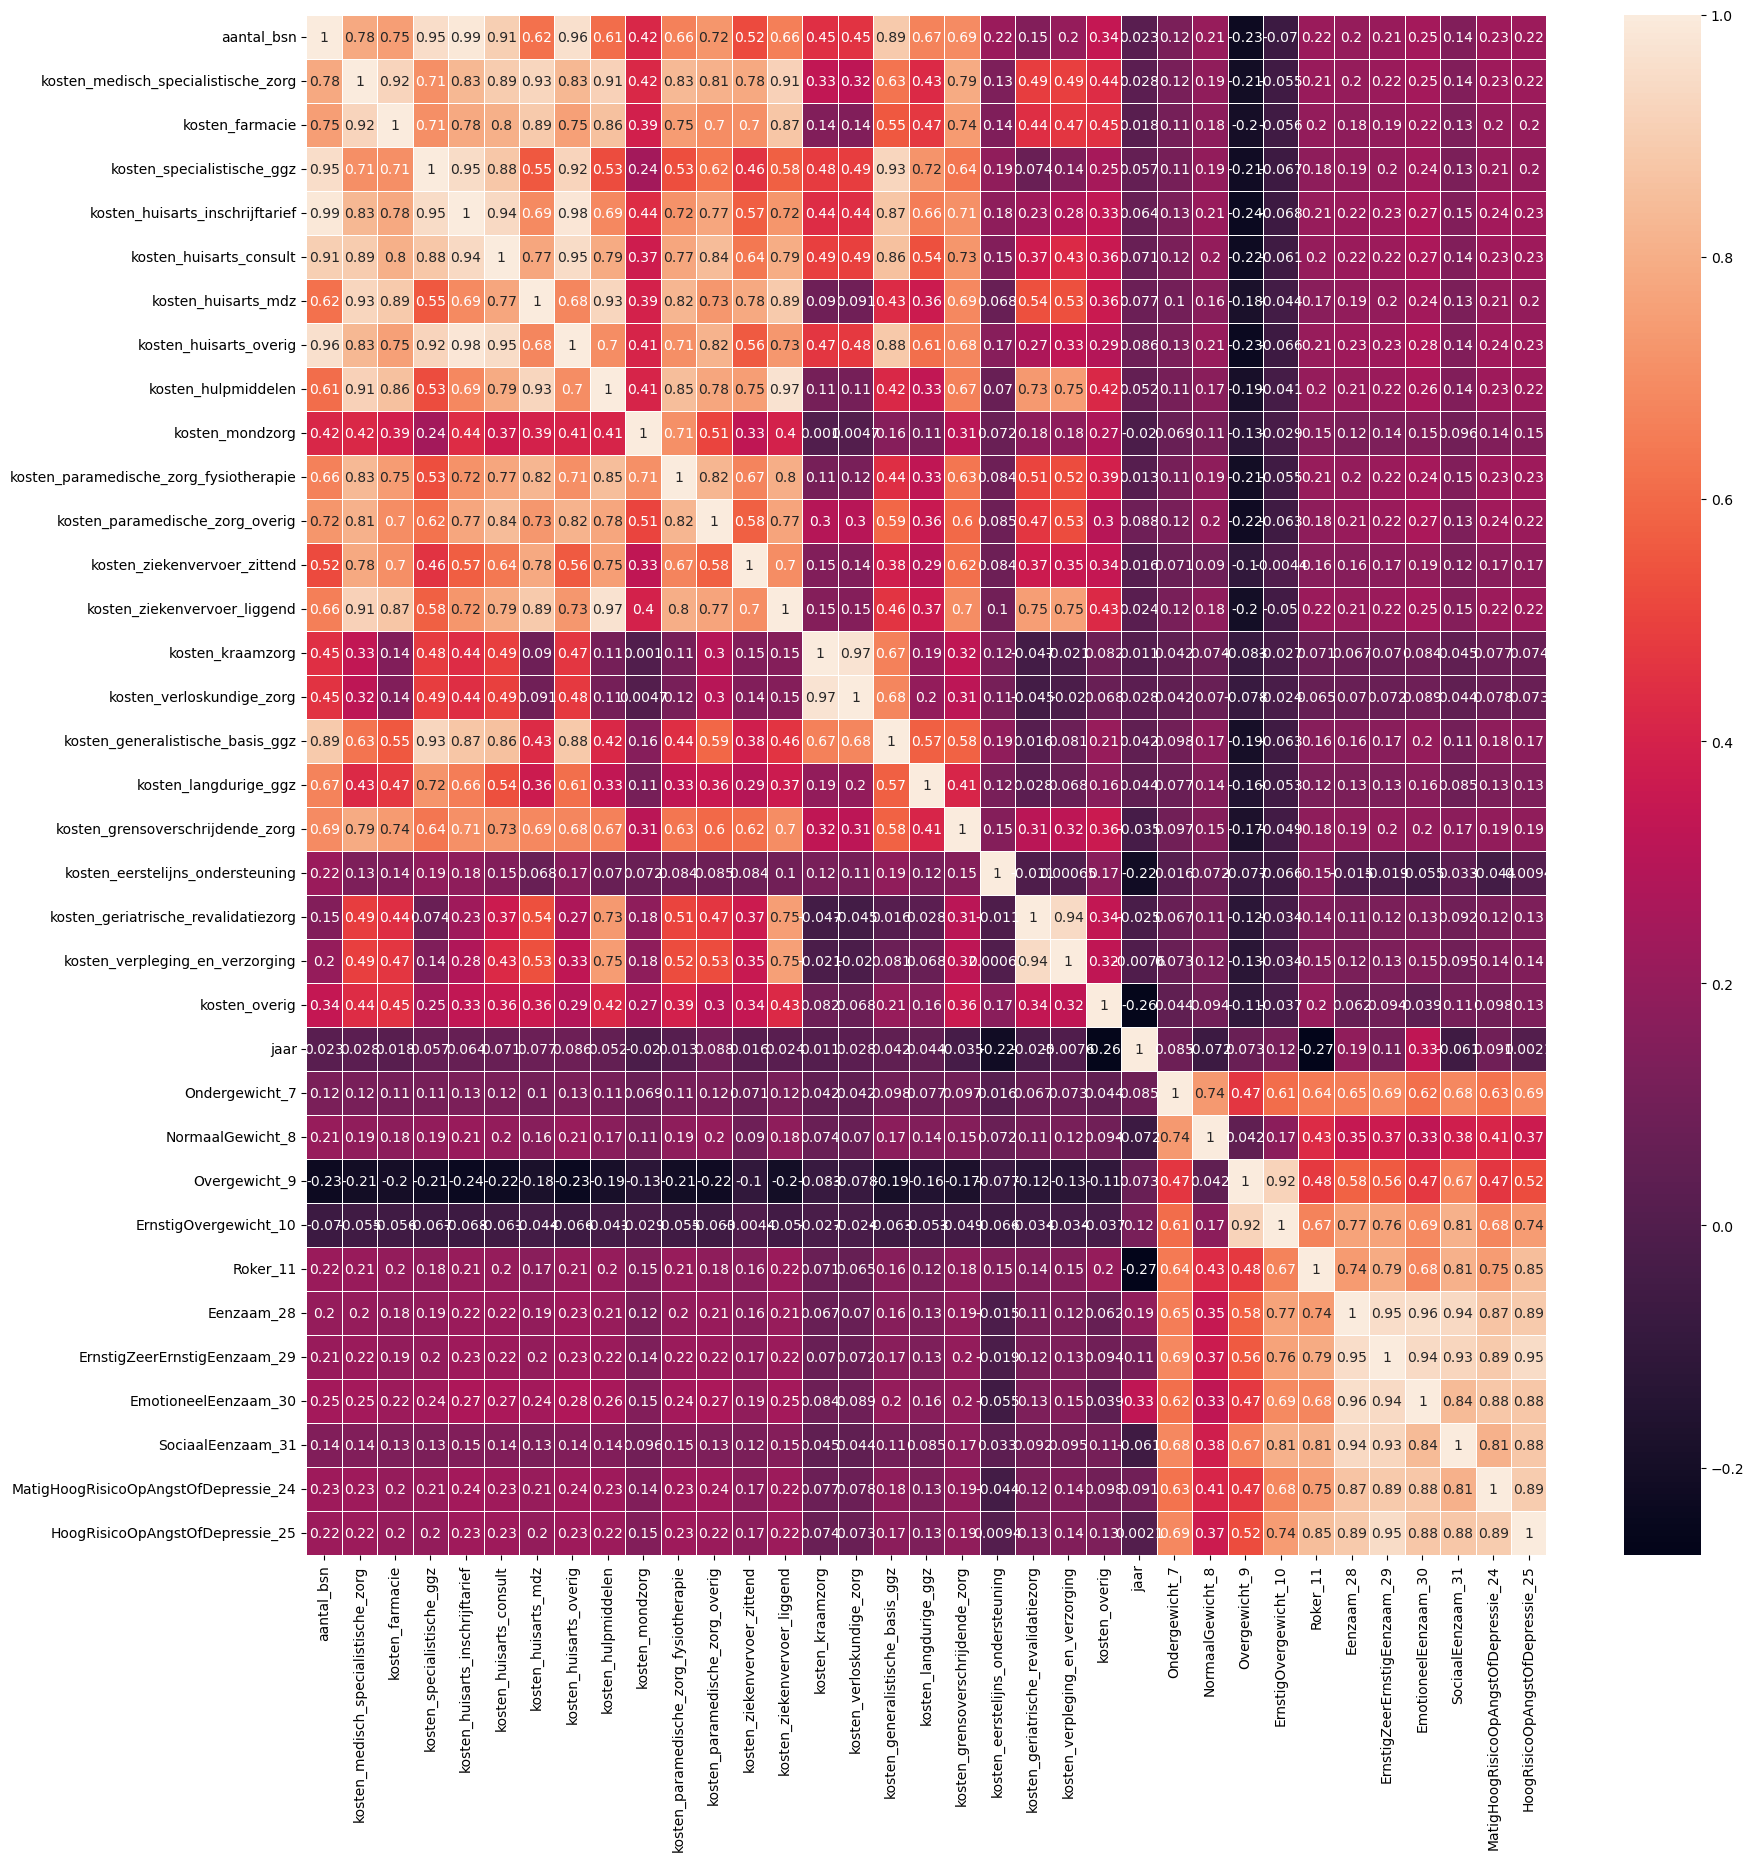

In [159]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
